# Outlier Analysis of Acme Co. Transactions

## Introduction

Welcome to the Outlier Analysis of Acme Co. Transactions project! This GitHub repository showcases an in-depth analysis of transaction data from Acme Co., a fictional online retail company. This project is specifically tailored for potential employers to demonstrate my data analysis skills and expertise.

The original dataset used in this analysis is sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/online+retail). It provides a comprehensive collection of transaction records, encompassing product details, customer information, and sales data.

As an analyst, my focus is on exploring and analyzing sales patterns outside of the United Kingdom for Acme Co. To achieve this, I have excluded sales data associated with the United Kingdom from the dataset. This allows us to concentrate on international sales and uncover insights specific to different countries.

The primary objective of this analysis is to identify outliers within the dataset and examine sales patterns to discover countries, products, and clients that exhibit disproportionately high or low sales volumes. By pinpointing outliers, we can gain valuable insights into potential anomalies, unusual trends, or exceptional data points that warrant further investigation.

By leveraging data visualization techniques, statistical analysis, and exploratory data exploration, this project aims to provide a comprehensive understanding of the outliers present in Acme Co. transactions. The insights derived from this analysis can assist organizations like Acme Co. in making informed, data-driven decisions to optimize their business operations and strategies.

I invite you to explore this GitHub repository to gain an appreciation for my data analysis skills and techniques. It showcases my ability to uncover hidden patterns, identify outliers, and derive meaningful insights from complex datasets. Feel free to review the Jupyter Notebook and associated visualizations to understand the thought process, methodologies, and outcomes of this outlier analysis project.

Thank you for your interest, and I look forward to discussing this project further with you.

## Data Description

The dataset contains transactional data of Acme Co., an online retailer based in the United Kingdom. The dataset consists of 8 variables that describe each transaction in the company's store. Here is a brief description of each variable:

- **InvoiceNo:** The unique identifier of each transaction.
- **StockCode:** The unique identifier of each product sold in the store.
- **Description:** A brief description of each product sold in the store.
- **Quantity:** The number of units of each product sold in the transaction.
- **InvoiceDate:** The date and time when the transaction was made.
- **UnitPrice:** The price of each unit of each product sold in the transaction.
- **TotalPrice:** UnitPrice x Quantity
- **CustomerID:** The unique identifier of each customer who made the transaction.
- **Country:** The country where the transaction was made.

Note that the dataset also includes transactions made in the United Kingdom, which were excluded in our analysis.

# Data Frame Preparation

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Importing Original Dataset

In [2]:
df_full_dataset = pd.read_csv("online_retail.csv")

In [3]:
df_full_dataset.head(1)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3


In [4]:
# Number of rows and columsn.
print("Rows:", df_full_dataset.shape[0])
print("Columns:", df_full_dataset.shape[1])

Rows: 541909
Columns: 10


## Reducing the Dataset
Because our analysis is only focused on countries outside of the United Kingdom, we are removing it from the dataset.

In [5]:
# Selecting all records that are NOT in the United Kingdom
df = df_full_dataset.loc[~df_full_dataset.Country.isin(['United Kingdom', 'Unspecified'])]

## Resetting Index

In [6]:
# Resetting index.
df = df.reset_index(drop=True).drop('Unnamed: 0', axis=1)
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,90.0


## Rearranging Columns

In [7]:
new_order = ['InvoiceDate', 'InvoiceNo', 'CustomerID', 'Country', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'TotalPrice']
df = df.reindex(columns=new_order)
df.head(1)

,InvoiceDate,InvoiceNo,CustomerID,Country,StockCode,Description,Quantity,UnitPrice,TotalPrice
0,2010-12-01 08:45:00,536370,12583.0,France,22728,ALARM CLOCK BAKELIKE PINK,24,3.75,90.0


Dataset has **541909** rows and **8** columns.

In [8]:
# Shape of the DataFrame
df.shape

(45985, 9)

## Saving Backup

In [9]:
df.to_csv("online_retail (UK excluded, precleaning)")

# Data Cleaning

In [10]:
df.sample(1)

,InvoiceDate,InvoiceNo,CustomerID,Country,StockCode,Description,Quantity,UnitPrice,TotalPrice
37875,2011-10-28 14:38:00,573286,NaN,Switzerland,22077,6 RIBBONS RUSTIC CHARM,7,1.95,13.65


## `InvoiceNo`
The dataset has been enhanced by adding a new column called "Cancelled" to indicate whether each order was cancelled or not. The "Cancelled" column contains "Yes" for cancelled orders and "No" for non-cancelled orders. Additionally, the "InvoiceNo" column has been modified by removing the "C" prefix from cancelled order numbers and converting all invoice numbers to integers.

In [12]:
# Create a new column to indicate whether each order was cancelled or not
df['Cancelled'] = df['InvoiceNo'].apply(lambda x: 'Yes' if str(x).startswith('C') else 'No')

# Strip the "C" prefix from InvoiceNo values and convert them to integers
df['InvoiceNo'] = df['InvoiceNo'].apply(lambda x: int(x[1:]) if str(x).startswith('C') else int(x))

In [13]:
df.loc[df['Cancelled']=='Yes'].sample(3)

,InvoiceDate,InvoiceNo,CustomerID,Country,StockCode,Description,Quantity,UnitPrice,TotalPrice,Cancelled
1173,2010-12-09 15:41:00,538123,12605.0,Germany,22331,WOODLAND PARTY BAG + STICKER SET,-1,1.65,-1.65,Yes
11727,2011-04-07 12:20:00,549253,12408.0,Belgium,22328,ROUND SNACK BOXES SET OF 4 FRUITS,-1,2.95,-2.95,Yes
11431,2011-04-05 09:53:00,548915,12668.0,Germany,22329,ROUND CONTAINER SET OF 5 RETROSPOT,-12,1.65,-19.80,Yes


## `StockCode`

In [17]:
df.StockCode.value_counts()

StockCode
POST     1112
22423     339
22326     316
22554     224
22556     208
         ... 
21421       1
23070       1
35954       1
20655       1
23522       1
Name: count, Length: 2795, dtype: int64

Need to drop all rows that have "POST" in them because it refers to the cost of postage and isn't relevant to our analysis.

In [14]:
df.drop(df[df['StockCode'] == "POST"].index, axis=0, inplace=True)

In [15]:
df.StockCode.value_counts()

StockCode
22423     339
22326     316
22554     224
22556     208
22629     202
         ... 
90205C      1
90205A      1
22685       1
84249A      1
23522       1
Name: count, Length: 2794, dtype: int64

## `Description`
Stripping the text of whitespaces.

In [16]:
# Remove leading/trailing white spaces
df['Description'] = df['Description'].str.strip()

## `Quantity`

- Some quantities are negative, meaning they were probably returns.
- Created `negative_qty` dataframe.

In [17]:
negative_qty = df[df['Quantity'] < 0]

               InvoiceDate  InvoiceNo  CustomerID  Country StockCode   
145    2010-12-01 14:33:00     536548     12472.0  Germany     22244  \
146    2010-12-01 14:33:00     536548     12472.0  Germany     22242   
147    2010-12-01 14:33:00     536548     12472.0  Germany     20914   
148    2010-12-01 14:33:00     536548     12472.0  Germany     22892   
149    2010-12-01 14:33:00     536548     12472.0  Germany     22654   
...                    ...        ...         ...      ...       ...   
45728  2011-12-08 14:08:00     581409     12476.0  Germany     82484   
45729  2011-12-08 14:08:00     581409     12476.0  Germany     82482   
45730  2011-12-08 14:08:00     581409     12476.0  Germany     22173   
45731  2011-12-08 14:08:00     581409     12476.0  Germany    85199L   
45732  2011-12-08 14:08:00     581409     12476.0  Germany     85127   

                               Description  Quantity  UnitPrice  TotalPrice   
145             3 HOOK HANGER MAGIC GARDEN        -4    

## `UnitPrice`
No problems.

In [18]:
df.head(1)

,InvoiceDate,InvoiceNo,CustomerID,Country,StockCode,Description,Quantity,UnitPrice,TotalPrice,Cancelled
0,2010-12-01 08:45:00,536370,12583.0,France,22728,ALARM CLOCK BAKELIKE PINK,24,3.75,90.0,No


There are a few cases where the price is zero. As an analyst, would need to ask questions about that.

In [26]:
df.loc[(df.UnitPrice == 0)].value_counts()

InvoiceDate          InvoiceNo  CustomerID  Country      StockCode  Description                          Quantity  UnitPrice  TotalPrice  Cancelled
2010-12-05 14:02:00  537197     12647.0     Germany      22841      ROUND CAKE TIN VINTAGE GREEN         1         0.0        0.0         No           1
2010-12-21 13:45:00  539722     14911.0     EIRE         22423      REGENCY CAKESTAND 3 TIER             10        0.0        0.0         No           1
2011-04-14 18:57:00  550188     12457.0     Switzerland  22636      CHILDS BREAKFAST SET CIRCUS PARADE   1         0.0        0.0         No           1
2011-05-20 14:13:00  554037     12415.0     Australia    22619      SET OF 6 SOLDIER SKITTLES            80        0.0        0.0         No           1
2011-07-28 17:09:00  561669     12507.0     Spain        22960      JAM MAKING SET WITH JARS             11        0.0        0.0         No           1
2011-08-11 11:42:00  562973     14911.0     EIRE         23157      SET OF 6 NATIVITY M

## `InvoiceDate`

Converting from object to datetime.

In [19]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [20]:
df.InvoiceDate

0       2010-12-01 08:45:00
1       2010-12-01 08:45:00
2       2010-12-01 08:45:00
3       2010-12-01 08:45:00
4       2010-12-01 08:45:00
                ...        
45980   2011-12-09 12:50:00
45981   2011-12-09 12:50:00
45982   2011-12-09 12:50:00
45983   2011-12-09 12:50:00
45984   2011-12-09 12:50:00
Name: InvoiceDate, Length: 44873, dtype: datetime64[ns]

## Period
We can see thje start and end of the time period.

In [21]:
print("Start:", df['InvoiceDate'].min())
print("Finish", df['InvoiceDate'].max())


Start: 2010-12-01 08:45:00
Finish 2011-12-09 12:50:00


## `CustomerID`
Keep in mind that there are some entries without CustomerID.

In [22]:
df.CustomerID.isna().value_counts()

CustomerID
False    43597
True      1276
Name: count, dtype: int64

There are also cases where the price is zero and the custoemr is NaN. Would need to investigate that.

In [29]:
df.loc[(df.CustomerID.isna()) & (df.UnitPrice == 0)]

,InvoiceDate,InvoiceNo,CustomerID,Country,StockCode,Description,Quantity,UnitPrice,TotalPrice,Cancelled
21579,2011-07-18 08:32:00,560283,NaN,EIRE,22624,IVORY KITCHEN SCALES,12,0.0,0.0,No
21580,2011-07-18 08:32:00,560283,NaN,EIRE,23196,VINTAGE LEAF MAGNETIC NOTEPAD,12,0.0,0.0,No


## `Country`

Here are all the countries in the dataset.

In [35]:
country_list = df.Country.unique()
country_list.sort()

In [36]:
print(country_list)

['Australia' 'Austria' 'Bahrain' 'Belgium' 'Brazil' 'Canada'
 'Channel Islands' 'Cyprus' 'Czech Republic' 'Denmark' 'EIRE'
 'European Community' 'Finland' 'France' 'Germany' 'Greece' 'Hong Kong'
 'Iceland' 'Israel' 'Italy' 'Japan' 'Lebanon' 'Lithuania' 'Malta'
 'Netherlands' 'Norway' 'Poland' 'Portugal' 'RSA' 'Saudi Arabia'
 'Singapore' 'Spain' 'Sweden' 'Switzerland' 'USA' 'United Arab Emirates']


## Backup

In [37]:
df.to_csv('online_retail (UK excluded, cleaned).csv')

# Outlier Analysis
In this section of the analysis, we will explore and investigate outliers within the transaction data of Acme Co. Our focus will be on identifying key insights related to customer behavior, countries with significant sales, and top-selling products.

In [39]:
df = pd.read_csv("online_retail (UK excluded, cleaned).csv")

## Which customers buy the most products?

We will delve into customer purchasing patterns to identify the customers who make the highest number of product purchases. By examining this information, we can gain insights into the most active and valuable customers for Acme Co. This analysis will help us understand the customer segments that contribute significantly to the company's sales.

### Number of Clients

This code tells us the total number of customers we have in the dataset.

In [44]:
df.CustomerID.nunique()

418

# How many items each client buys.

Calculates the total quantity of products purchased by each customer and filters out customers with a quantity of 0 or less, resulting in a series of customers and their corresponding positive total quantities.

In [98]:
clients_by_quantity = df.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False)
clients_by_quantity = clients_by_quantity[clients_by_quantity > 0]

CustomerID
14646.0    196651
Name: Quantity, dtype: int64

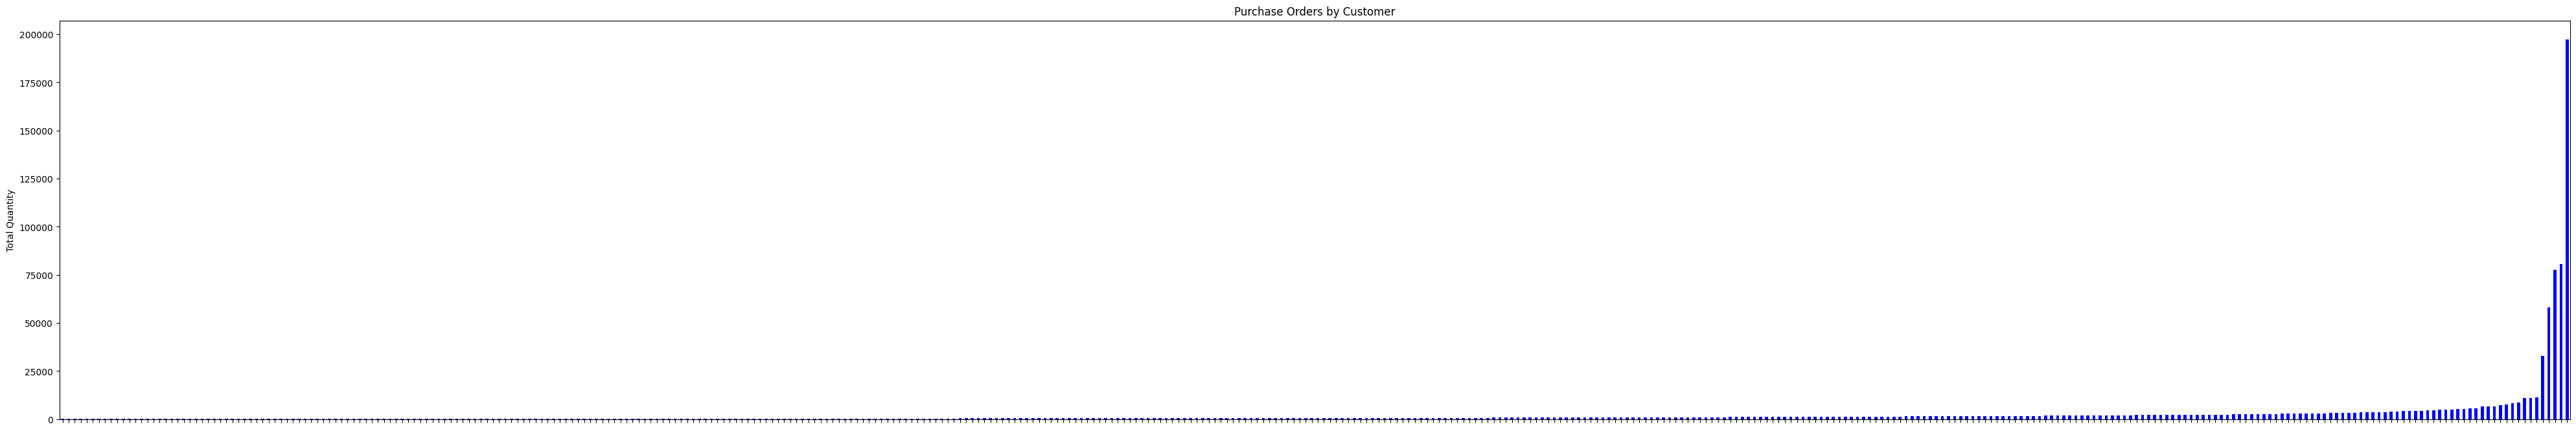

In [73]:
# Create the bar plot
ax = clients_by_quantity.plot(kind='bar', color='blue', figsize=(50,8))

# Set plot aesthetics
ax.set_xlabel('')
ax.set_ylabel('Total Quantity')
ax.set_title('Purchase Orders by Customer')

# Remove x-axis tick labels
ax.set_xticklabels([])

# Show the plot
plt.show()

The bar plot above illustrates the distribution of purchase orders by customer for Acme Co. It is evident from the graph that a small number of customers are responsible for the majority of orders, while the remaining customers contribute relatively little. This indicates a highly skewed distribution, where very few customers make a significant number of purchases, while the majority of customers make comparatively fewer orders. Consequently, traditional indicators such as the mean and median may not be useful in capturing the overall pattern of customer purchasing behavior in this dataset.

# Percentiles

In [206]:
num = clients_by_quantity.sort_values()
num.iloc[75 - 1]

172

### Countries of Top Clients
Let's see who these customers are.
With the provided code, we can identify the countries of the top purchasers.

In [95]:
# Getting the customer IDS of the top 10 producers.
top_10_clients = df.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(10).index.to_list()


df[['CustomerID', 'Country']].loc[df['CustomerID'].isin(top_10_clients)].value_counts()

CustomerID  Country    
14911.0     EIRE           5903
14646.0     Netherlands    2068
14156.0     EIRE           1420
12415.0     Australia       776
12471.0     Germany         510
12433.0     Norway          420
12731.0     France          275
12753.0     Japan           230
17404.0     Sweden          199
12678.0     France          159
Name: count, dtype: int64

### How valuable the top client is worth.

From here, we can see that the top client `14646` is from the Netherlands.
And we can also see that they bring in $278,466 in total revenue.

In [115]:
# Top Clients BY SALES
client_revenue = df.groupby(['CustomerID', 'Country'])['TotalPrice'].sum().sort_values(ascending=False).head(1)
client_revenue

CustomerID  Country    
14646.0     Netherlands    278466.02
Name: TotalPrice, dtype: float64

And the total sales are **$1,487,552**.

In [114]:
total_revenue = df.TotalPrice.sum()
total_revenue

1487552.57

Meaning that ONE client is responsible for 18.7% of the company's revenue!

In [116]:
client_revenue / total_revenue

CustomerID  Country    
14646.0     Netherlands    0.187197
Name: TotalPrice, dtype: float64

## Which products sell the most?

Identifying the top-selling products is essential for Acme Co. to optimize their inventory management and marketing strategies. By analyzing the sales data, we can identify the products that generate the highest sales volume. This analysis will allow us to understand customer preferences, identify popular product categories, and make data-driven decisions to maximize sales and profitability.

Through these analyses, we aim to uncover valuable insights and outliers that will enable Acme Co. to make informed business decisions, refine their sales strategies, and drive overall growth.

Let's proceed with the analysis and explore the fascinating outlier patterns within Acme Co.'s transaction data!

In [117]:
df.head(1)

,Unnamed: 0,InvoiceDate,InvoiceNo,CustomerID,Country,StockCode,Description,Quantity,UnitPrice,TotalPrice,Cancelled
0,0,2010-12-01 08:45:00,536370,12583.0,France,22728,ALARM CLOCK BAKELIKE PINK,24,3.75,90.0,No


From the provided output, we can observe the most popular products based on the quantity sold. The top products are as follows:

In [133]:
top_products = df.groupby(['Description'])['Quantity'].sum().sort_values(ascending=False)
top_products = top_products[top_products > 0]
top_products

Description
RABBIT NIGHT LIGHT                  15465
MINI PAINT SET VINTAGE              12517
PACK OF 72 RETROSPOT CAKE CASES     11300
SPACEBOY LUNCH BOX                   8374
DOLLY GIRL LUNCH BOX                 7161
                                    ...  
MOROCCAN BEATEN METAL DISH LARGE        1
DANISH ROSE BEDSIDE CABINET             1
FAUX FUR CHOCOLATE THROW                1
SET 36 COLOURING PENCILS DOILEY         1
DANISH ROSE FOLDING CHAIR               1
Name: Quantity, Length: 2841, dtype: int64

### Bar Chart
As we can see from the bar chart, we have the same situation where most of the products have really low sales, but there is a small group that of products that has most of the sales.

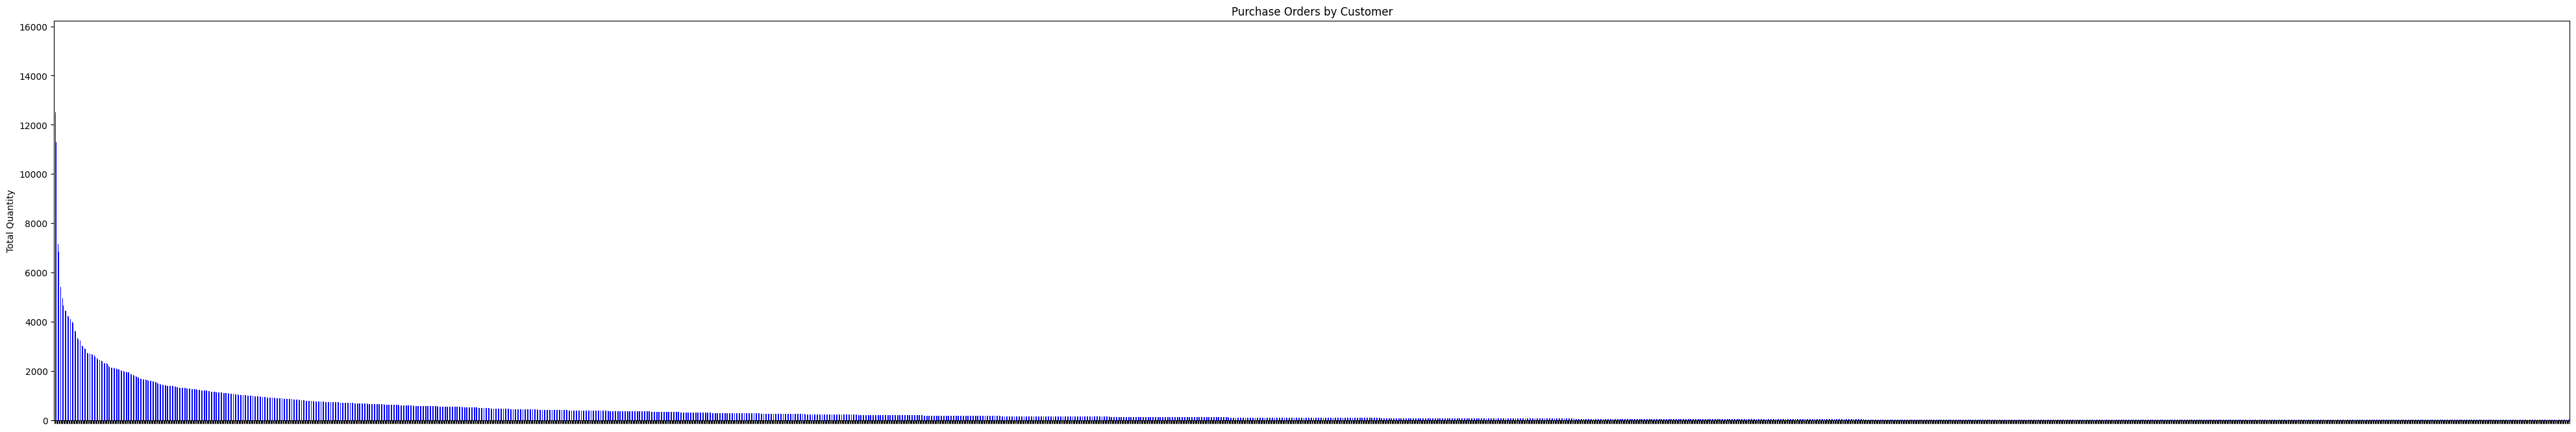

In [135]:
# Create the bar plot
ax = top_products.sort_values(ascending=False).plot(kind='bar', color='blue', figsize=(50,8))

# Set plot aesthetics
ax.set_xlabel('')
ax.set_ylabel('Total Quantity')
ax.set_title('Purchase Orders by Customer')

# Remove x-axis tick labels
ax.set_xticklabels([])

# Show the plot
plt.show()

## Top Products
So let's see which products are the most selling in general.

### Different Products

In [145]:
df.StockCode.nunique()

2794

### Top Products

In [144]:
top_products.head(10)

Description
RABBIT NIGHT LIGHT                    15465
MINI PAINT SET VINTAGE                12517
PACK OF 72 RETROSPOT CAKE CASES       11300
SPACEBOY LUNCH BOX                     8374
DOLLY GIRL LUNCH BOX                   7161
ROUND SNACK BOXES SET OF4 WOODLAND     6834
RED TOADSTOOL LED NIGHT LIGHT          6762
WORLD WAR 2 GLIDERS ASSTD DESIGNS      5425
PLASTERS IN TIN WOODLAND ANIMALS       5168
PLASTERS IN TIN SPACEBOY               4954
Name: Quantity, dtype: int64

## By Country
Now let's see them by country.

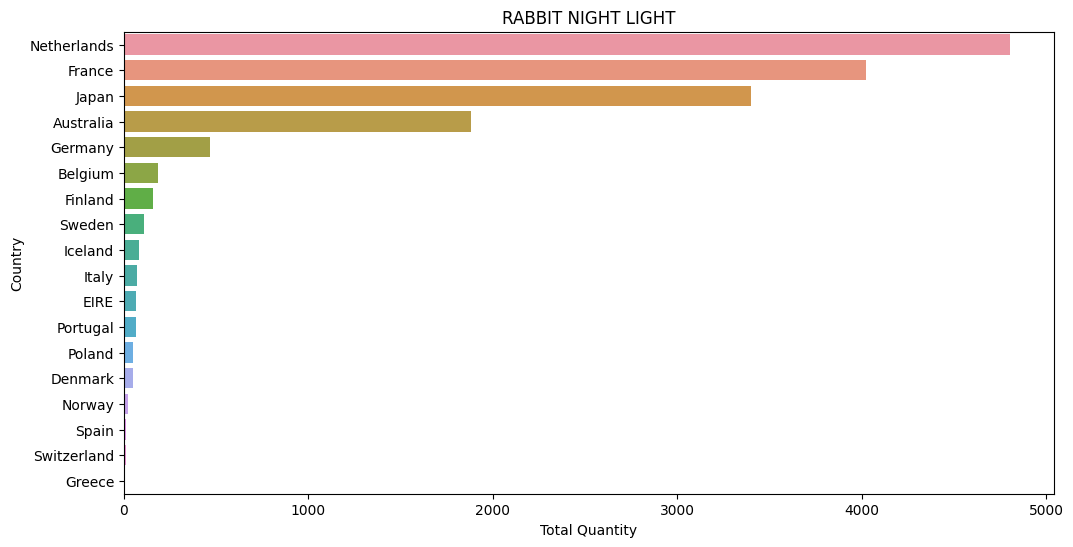

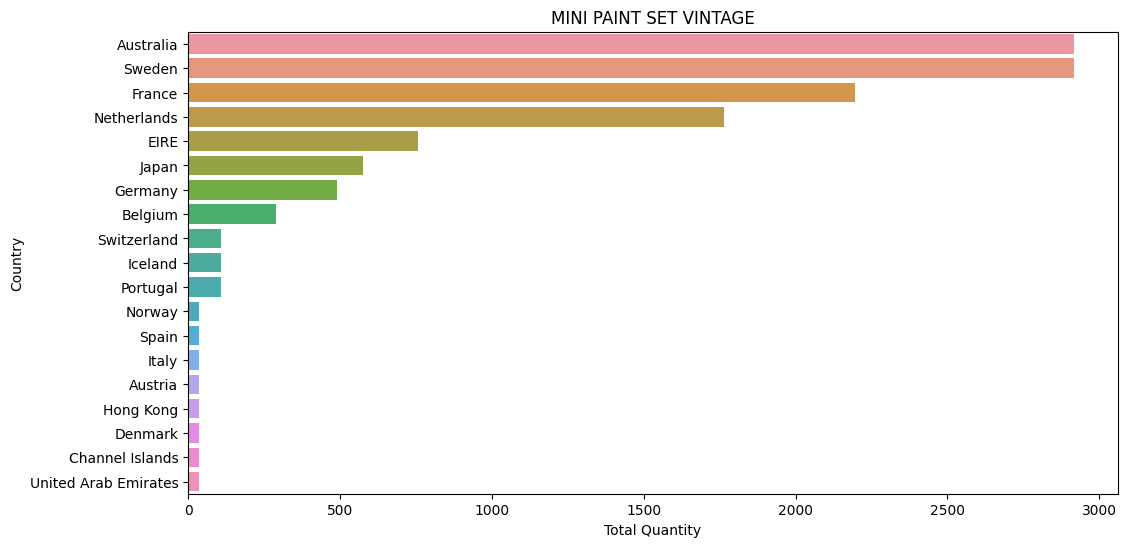

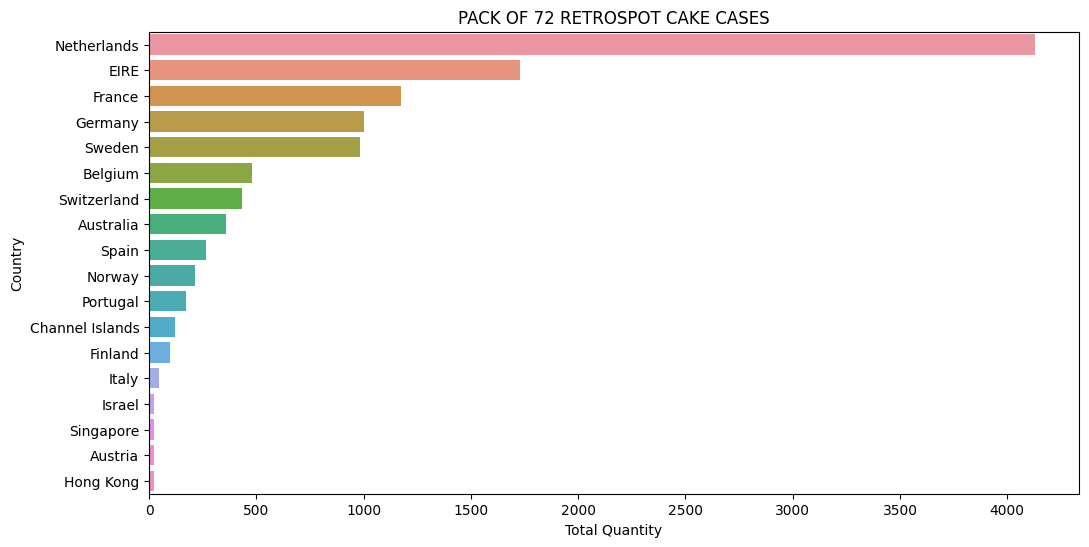

In [143]:
# Create a DataFrame with the top products and their country quantities
top_products_df = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(3).reset_index()

for _, row in top_products_df.iterrows():
    description = row['Description']
    country_totals = df.loc[df['Description'] == description].groupby('Country')['Quantity'].sum().sort_values(ascending=False)
    country_totals = country_totals[country_totals > 0]
    
    # Create the histogram
    plt.figure(figsize=(12, 6))
    sns.barplot(x=country_totals.values, y=country_totals.index)
    plt.title(description)
    plt.xlabel('Total Quantity')
    plt.ylabel('Country')
    plt.show()


We can see from each of the top selling products, that they too follow a Pareto Distribution where their success is in a particular country.

## Who is buying these products?

[Sales]

## How much are these products worth? Compared to total revenue.

[Revenue]

# Analysis Summary

## Understanding Customer Purchasing Patterns

The analysis of customer purchasing patterns reveals valuable insights that can guide our actions and strategies. While the data is limited in resolution, it provides leads for further investigation and decision-making.

### Concentration of Orders

- The data comprises 418 unique customers, and we observe that the majority of orders are concentrated among a small group of customers.
- This finding highlights the significance of focusing on these key customers who contribute significantly to the company's sales.

### Popularity of Products

- Among the 2,794 different products available, we observe that a small percentage of products constitute the majority of sales.
- Approximately 20% of the products emerge as the most popular choices, while the remaining products experience comparatively lower sales volumes.

### Regional Variations

- Our analysis also reveals that popular products tend to be concentrated in specific countries.
- Each popular product exhibits popularity primarily in a few select countries, indicating potential market segmentation opportunities.

## Action Steps

1. Identify and prioritize the top customers who generate the highest order volumes. This group presents an opportunity for further engagement and potentially establishing long-term relationships.
2. Focus on promoting and optimizing the sales of the most popular products. These products have proven demand and can contribute significantly to overall sales.
3. Analyze the regional variations in product popularity and tailor marketing strategies accordingly. Understanding the preferences and buying behavior of customers in different countries can help us target the right markets more effectively.

Although the current analysis provides initial insights, further exploration and data refinement are recommended to gain a comprehensive understanding of customer behavior and maximize sales potential.